<span style="color:blue; font-size:35px;">Model Performance Comparison on Imbalanced Target Data</span>

<span style="color:navy; font-size:25px;">Objective</span>

To evaluate and compare the performance of K-Nearest Neighbors (KNN), Logistic Regression, Decision Tree, and Support Vector Machine (SVM) models on a dataset with an imbalanced target variable. The analysis focused on how each model's precision, recall, and overall accuracy metrics were affected before and after applying the SMOTE (Synthetic Minority Over-sampling Technique) to address class imbalance. 



<span style="color:navy; font-size:25px;">Data</span>

[Moro et al., 2011] S. Moro, R. Laureano and P. Cortez. Using Data Mining for Bank Direct Marketing: An Application of the CRISP-DM Methodology. 
  In P. Novais et al. (Eds.), Proceedings of the European Simulation and Modelling Conference - ESM'2011, pp. 117-121, Guimarães, Portugal, October, 2011. EUROSIS.

  Available at: [pdf] http://hdl.handle.net/1822/14838
                [bib] http://www3.dsi.uminho.pt/pcortez/bib/2011-esm-1.txt

1. Title: Bank Marketing

2. Sources
   Created by: Paulo Cortez (Univ. Minho) and Sérgio Moro (ISCTE-IUL) @ 2012
   
3. Past Usage:

The full dataset was described and analyzed in:

S. Moro, R. Laureano and P. Cortez. Using Data Mining for Bank Direct Marketing: An Application of the CRISP-DM Methodology. 
In P. Novais et al. (Eds.), Proceedings of the European Simulation and Modelling Conference - ESM'2011, pp. 117-121, Guimarães, 
Portugal, October, 2011. EUROSIS.

4. Relevant Information:

   The data is related with direct marketing campaigns of a Portuguese banking institution. 
   The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, 
   in order to access if the product (bank term deposit) would be (or not) subscribed. 

   There are two datasets: 
      1) bank-full.csv with all examples, ordered by date (from May 2008 to November 2010).
      2) bank.csv with 10% of the examples (4521), randomly selected from bank-full.csv.
   The smallest dataset is provided to test more computationally demanding machine learning algorithms (e.g. SVM).

   The classification goal is to predict if the client will subscribe a term deposit (variable y).

5. Number of Instances: 45211 for bank-full.csv (4521 for bank.csv)

6. Number of Attributes: 16 + output attribute.

7. Attribute information:

   For more information, read [Moro et al., 2011].

   Input variables:
   
   ## Bank client data:
   
age: (numeric)
   
job : type of job (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student",
                                       "blue-collar","self-employed","retired","technician","services") 
                                       
marital : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)
   
education (categorical: "unknown","secondary","primary","tertiary")
   
default: has credit in default? (binary: "yes","no")
   
balance: average yearly balance, in euros (numeric) 
   
housing: has housing loan? (binary: "yes","no")
   
loan: has personal loan? (binary: "yes","no")
   
   ## Related with the last contact of the current campaign:
   
contact: contact communication type (categorical: "unknown","telephone","cellular") 
   
day: last contact day of the month (numeric)
  
month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")
  
duration: last contact duration, in seconds (numeric)
  
   ## Other attributes:
   
campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
  
pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)
  
previous: number of contacts performed before this campaign and for this client (numeric)
  
poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")

  #### Target variable:
  
y - has the client subscribed a term deposit? (binary: "yes","no")

8. Missing Attribute Values: None

<span style="color:navy; font-size:25px;">Data Investigation & Preparation</span>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import OneHotEncoder

In [3]:
import csv
import pandas as pd

# Read the CSV data using the csv module
file_path = r'C:\Users\agnek\OneDrive\Documents\Educational_Training Materials\Berkeley Haas\Codio\Module17\Bank_Marketing.csv'

with open(file_path, mode='r', encoding='utf-8') as file:
    # Extract the first line (headers) and split based on the semicolon delimiter
    headers = file.readline().strip().split(';')
    headers = [h.replace('"', '') for h in headers]  # Remove any extra quotes
    
    # Use a list to hold the rows of data
    data = []
    
    # Read the rest of the rows in the file
    for line in file:
        # Split each line on the semicolon delimiter
        row = line.strip().split(';')
        row = [r.replace('"', '') for r in row]  # Clean any extra quotes
        data.append(row)

# Convert to pandas DataFrame
df = pd.DataFrame(data, columns=headers)

# Display the DataFrame
print(df.head())

  age           job  marital  education default balance housing loan  contact  \
0  58    management  married   tertiary      no    2143     yes   no  unknown   
1  44    technician   single  secondary      no      29     yes   no  unknown   
2  33  entrepreneur  married  secondary      no       2     yes  yes  unknown   
3  47   blue-collar  married    unknown      no    1506     yes   no  unknown   
4  33       unknown   single    unknown      no       1      no   no  unknown   

  day month duration campaign pdays previous poutcome   y  
0   5   may      261        1    -1        0  unknown  no  
1   5   may      151        1    -1        0  unknown  no  
2   5   may       76        1    -1        0  unknown  no  
3   5   may       92        1    -1        0  unknown  no  
4   5   may      198        1    -1        0  unknown  no  


In [4]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


### Explanation:
#### Manually Handling the Header:

We read the first line (header) using file.readline() and split it manually on the semicolon delimiter.
Quotes are removed from the header elements using a list comprehension.

#### Reading Data Rows:

Each subsequent line is read, stripped of leading/trailing whitespace, and split based on the semicolon delimiter.
Quotes are removed from each element of the row before appending it to the data list.

#### Creating the DataFrame:

The cleaned data is then passed into a pandas.DataFrame() along with the cleaned headers to create the DataFrame.

#### Result:

The df.head() command should now print the first few rows of your DataFrame, correctly formatted without any column mismatch errors.

### Why This Works:
This approach directly addresses any inconsistencies in how the CSV file might be structured or how delimiters are handled, ensuring that each row is properly split and cleaned before being added to the DataFrame.

By manually processing the file line by line, we have more control over how the data is parsed, which helps avoid issues that might arise with the csv.reader in cases where the data structure is non-standard.

In [5]:
#Doublecheck for missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  object
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  object
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  object
 10  month      45211 non-null  object
 11  duration   45211 non-null  object
 12  campaign   45211 non-null  object
 13  pdays      45211 non-null  object
 14  previous   45211 non-null  object
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: object(17)
memory usage: 5.9+ MB


In [6]:
#Convert object data types for numeric columns into int64
df[['age', 'balance', 'day','duration','campaign','pdays','previous']] = df[['age', 'balance', 'day','duration','campaign','pdays','previous']].apply(pd.to_numeric)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [8]:
# Using pd.get_dummies for binary variables
df = pd.get_dummies(df, columns=['default', 'housing', 'loan','y'], drop_first=True)

df.head()

,age,job,marital,education,balance,contact,day,month,duration,campaign,pdays,previous,poutcome,default_yes,housing_yes,loan_yes,y_yes
0,58,management,married,tertiary,2143,unknown,5,may,261,1,-1,0,unknown,0,1,0,0
1,44,technician,single,secondary,29,unknown,5,may,151,1,-1,0,unknown,0,1,0,0
2,33,entrepreneur,married,secondary,2,unknown,5,may,76,1,-1,0,unknown,0,1,1,0
3,47,blue-collar,married,unknown,1506,unknown,5,may,92,1,-1,0,unknown,0,1,0,0
4,33,unknown,single,unknown,1,unknown,5,may,198,1,-1,0,unknown,0,0,0,0


In [9]:
# Instantiate the OneHotEncoder
encoder = OneHotEncoder(drop='first', sparse=False)

# Fit and transform the data
encoded_df = pd.DataFrame(encoder.fit_transform(df[['job', 'marital', 'education', 'contact', 'month', 'poutcome']]),
                          columns=encoder.get_feature_names_out(['job', 'marital', 'education', 'contact', 'month', 'poutcome']))

# Concatenate with the original DataFrame (excluding original categorical columns)
df_encoded = pd.concat([df.drop(['job', 'marital', 'education', 'contact', 'month', 'poutcome'], axis=1), encoded_df], axis=1)

df_encoded.head()

,age,balance,day,duration,campaign,pdays,previous,default_yes,housing_yes,loan_yes,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
0,58,2143,5,261,1,-1,0,0,1,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,44,29,5,151,1,-1,0,0,1,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,33,2,5,76,1,-1,0,0,1,1,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,47,1506,5,92,1,-1,0,0,1,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,33,1,5,198,1,-1,0,0,0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [10]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 43 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  45211 non-null  int64  
 1   balance              45211 non-null  int64  
 2   day                  45211 non-null  int64  
 3   duration             45211 non-null  int64  
 4   campaign             45211 non-null  int64  
 5   pdays                45211 non-null  int64  
 6   previous             45211 non-null  int64  
 7   default_yes          45211 non-null  uint8  
 8   housing_yes          45211 non-null  uint8  
 9   loan_yes             45211 non-null  uint8  
 10  y_yes                45211 non-null  uint8  
 11  job_blue-collar      45211 non-null  float64
 12  job_entrepreneur     45211 non-null  float64
 13  job_housemaid        45211 non-null  float64
 14  job_management       45211 non-null  float64
 15  job_retired          45211 non-null 

y counts:
 0    39922
1     5289
Name: y_yes, dtype: int64


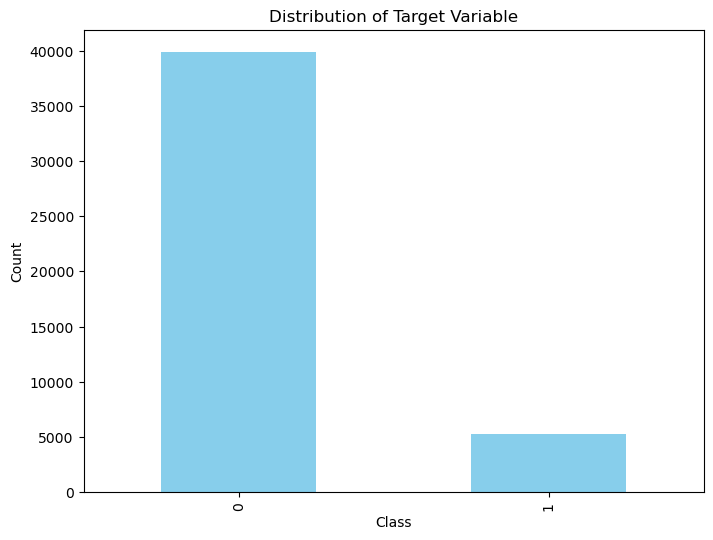

Class proportions:
 0    0.883015
1    0.116985
Name: y_yes, dtype: float64


In [11]:
# Examine the target variable
y_counts = df_encoded['y_yes'].value_counts()
print("y counts:\n", y_counts)

# Visualize the distribution
plt.figure(figsize=(8, 6))
y_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Distribution of Target Variable')
plt.show()

# Calculate class proportions
y_proportions = df_encoded['y_yes'].value_counts(normalize=True)
print("Class proportions:\n", y_proportions)

<span style="color:navy; font-size:25px;">Modeling & Evaluation</span>

In [45]:
#Define X and y
X = df_encoded.drop('y_yes', axis=1)
y = df_encoded['y_yes']


# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [46]:
# Standardize the features (this will also address the negative value issue in pday column)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)




<span style="color:red; font-size:25px;">KNN Model</span>

In [48]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)

print("K-Nearest Neighbors:")
print(classification_report(y_test, knn_pred))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


K-Nearest Neighbors:
              precision    recall  f1-score   support

           0       0.92      0.96      0.94     11966
           1       0.55      0.35      0.43      1598

    accuracy                           0.89     13564
   macro avg       0.73      0.66      0.68     13564
weighted avg       0.87      0.89      0.88     13564



### Analysis:

#### Imbalance Issue: 
The dataset is highly imbalanced, with a much larger number of class 0 instances compared to class 1. This imbalance is reflected in the model's performance, where it performs very well on the majority class (class 0) but struggles with the minority class (class 1).

#### Poor Performance on Minority Class: 
The precision, recall, and F1-score for class 1 are significantly lower than those for class 0. This indicates that the model is not effectively identifying class 1 instances, which is a common issue in imbalanced datasets.

#### High Accuracy but Misleading: 
The overall accuracy of 0.89 seems high, but it is primarily driven by the model's performance on the majority class. Given the poor performance on class 1, accuracy alone does not provide a complete picture of the model’s effectiveness.

### Potential Improvements:

#### Resampling Techniques: 
Consider using oversampling techniques like SMOTE (Synthetic Minority Over-sampling Technique) or undersampling the majority class to balance the dataset.

#### Adjust Class Weights: 
Implementing class weights in the KNN model or trying models that naturally handle imbalanced data better, such as Random Forests with class weighting.

#### Threshold Tuning: 
Adjust the decision threshold for class 1 to improve recall, although this may impact precision.

### Conclusion:
The KNN model performs well on the majority class but struggles with the minority class due to the imbalanced nature of the dataset. To improve the model's performance on the minority class, especially in applications where correctly identifying class 1 is critical, techniques to address class imbalance should be considered.




### KNN with SMOTE

First, make sure you have the imbalanced-learn library installed. You can install it using pip:

#### pip install imbalanced-learn

In [52]:
#Install required library
from imblearn.over_sampling import SMOTE

In [53]:
# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Check the balance of the resampled data
print("Original target class distribution:")
print(y_train.value_counts())

print("\nResampled target class distribution:")
print(y_train_res.value_counts())

Original target class distribution:
0    27956
1     3691
Name: y_yes, dtype: int64

Resampled target class distribution:
0    27956
1    27956
Name: y_yes, dtype: int64


In [ ]:
#from imblearn.under_sampling import RandomUnderSampler

## Apply undersampling to the training data
#undersampler = RandomUnderSampler(random_state=42)
#X_train_res, y_train_res = undersampler.fit_resample(X_train, y_train)

## Check the balance of the resampled data
#print("Original target class distribution:")
#print(y_train.value_counts())

#print("\nResampled target class distribution:")
#print(y_train_res.value_counts())

In [ ]:
#from imblearn.combine import SMOTEENN

## Combine SMOTE with undersampling using SMOTEENN
#smote_enn = SMOTEENN(random_state=42)
#X_train_res, y_train_res = smote_enn.fit_resample(X_train, y_train)

## Check the balance of the resampled data
#print("Original target class distribution:")
#print(y_train.value_counts())

#print("\nResampled target class distribution:")
#print(y_train_res.value_counts())

Summary:
SMOTE: Generates synthetic samples for the minority class to balance the dataset.
Undersampling: Reduces the number of samples in the majority class to balance the dataset.
Combined Techniques: Methods like SMOTEENN and SMOTETomek combine oversampling and undersampling to achieve better balance.
These techniques help to address class imbalance, leading to more robust and fair models. However, it’s essential to evaluate the impact of these techniques on your model’s performance, as they can sometimes introduce noise or remove important instances.

In [55]:
from sklearn.metrics import classification_report

# Train the model using the resampled data
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_res, y_train_res)

# Predict on the test data
y_pred = knn.predict(X_test)

# Evaluate the model
print("K-Nearest Neighbors:")
print(classification_report(y_test, y_pred))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


K-Nearest Neighbors:
              precision    recall  f1-score   support

           0       0.95      0.88      0.91     11966
           1       0.41      0.63      0.50      1598

    accuracy                           0.85     13564
   macro avg       0.68      0.75      0.70     13564
weighted avg       0.88      0.85      0.86     13564



### Summary:

#### Improvement for Class 1: 
SMOTE successfully improved the model's ability to detect class 1 (minority class), as evidenced by the significant increase in recall from 0.35 to 0.63. This means the model is now better at identifying true positives for the minority class.

#### Trade-offs: 
While recall for class 1 improved, precision for class 1 decreased, leading to more false positives. This trade-off is common when applying SMOTE, as the model becomes more inclusive in identifying the minority class, sometimes at the cost of precision.

#### Overall Balance: 
The macro average metrics show that the model's ability to handle both classes more equitably improved, with better recall but slightly lower precision.

### Conclusion:
After applying SMOTE, the KNN model became more effective at identifying the minority class (class 1), as seen by the improved recall and F1-score for class 1. However, this came at the cost of reduced precision for class 1 and a slight drop in overall accuracy. The application of SMOTE made the model more balanced in handling both classes, which is particularly useful in scenarios where detecting the minority class is crucial.




<span style="color:red; font-size:25px;">Logistic Regression Model</span>

In [49]:
lr = LogisticRegression(max_iter=200, class_weight='balanced')
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)

print("Logistic Regression:")
print(classification_report(y_test, lr_pred))

Logistic Regression:
              precision    recall  f1-score   support

           0       0.97      0.85      0.91     11966
           1       0.42      0.82      0.56      1598

    accuracy                           0.85     13564
   macro avg       0.70      0.84      0.73     13564
weighted avg       0.91      0.85      0.87     13564



### Analysis:

#### Class Imbalance Handling:

The model shows a decent recall for both classes, particularly for the minority class (class 1). This indicates that the logistic regression model is reasonably sensitive to class 1, which is a good sign for imbalanced datasets.
However, the low precision for class 1 (0.42) indicates that many instances predicted as class 1 are actually class 0, leading to a higher number of false positives.

#### Model Performance:

The high recall and low precision for class 1 suggest that the model is more concerned with capturing all possible positive instances, even at the cost of increasing false positives. This trade-off might be acceptable depending on the application; for example, in cases where it's more critical to identify all positives (class 1) even if some negatives (class 0) are incorrectly identified as positives.

The overall accuracy of 0.85 is strong but might not fully reflect the model's performance on the minority class.

### Potential Improvements:

#### Threshold Adjustment: 
Adjusting the decision threshold for class 1 could help improve precision at the cost of recall. This would be useful if the application requires higher confidence in positive predictions.

#### Alternative Models: 
Exploring more complex models such as Random Forests or Gradient Boosting Machines (GBMs) that might handle imbalanced datasets more effectively.

#### Class Weights: 
Logistic regression allows for class weights. You might consider fine-tuning the class weights to improve precision for the minority class.

### Conclusion:
The logistic regression model performs well in terms of overall recall, particularly for the minority class. However, the low precision for class 1 suggests that the model produces a relatively high number of false positives. Depending on the application, this trade-off may be acceptable, but further tuning or the use of more advanced techniques might be necessary to improve the model's performance, particularly in scenarios where false positives are costly

### Logistic Regression with SMOTE

In [56]:
# Train the Logistic Regression model using the resampled data
lr = LogisticRegression(random_state=42)
lr.fit(X_train_res, y_train_res)

# Predict on the test data
y_pred = lr.predict(X_test)

# Evaluate the model
print("Logistic Regression after SMOTE:")
print(classification_report(y_test, y_pred))

Logistic Regression after SMOTE:
              precision    recall  f1-score   support

           0       0.97      0.85      0.91     11966
           1       0.42      0.82      0.56      1598

    accuracy                           0.85     13564
   macro avg       0.70      0.83      0.73     13564
weighted avg       0.91      0.85      0.87     13564





<span style="color:red; font-size:25px;">Decision Tree Classifier</span>

In [50]:
dt = DecisionTreeClassifier(class_weight='balanced')
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)

print("Decision Tree:")
print(classification_report(y_test, dt_pred))

Decision Tree:
              precision    recall  f1-score   support

           0       0.93      0.93      0.93     11966
           1       0.47      0.45      0.46      1598

    accuracy                           0.87     13564
   macro avg       0.70      0.69      0.69     13564
weighted avg       0.87      0.87      0.87     13564



### Analysis:

#### Imbalance Issue:

The model performs well on the majority class (class 0), with high precision, recall, and F1-score. However, it struggles with the minority class (class 1), as seen by the lower precision (0.47) and recall (0.45). This is a common issue when dealing with imbalanced datasets, where the model tends to favor the majority class.

#### Class 1 Performance:

The low precision for class 1 indicates that many instances predicted as class 1 are actually class 0 (false positives). The low recall indicates that the model is missing a significant portion of the actual class 1 instances (false negatives). This results in a low F1-score of 0.46, which reflects the poor performance in classifying the minority class.

#### Overall Accuracy:

The accuracy of 0.87 is good, but it is primarily driven by the model's performance on the majority class. This highlights the limitations of using accuracy as a sole metric, especially when dealing with imbalanced datasets.

### Potential Improvements:

#### Resampling Techniques: 
Consider using oversampling (e.g., SMOTE) for class 1 or undersampling for class 0 to balance the classes more effectively.

#### Adjusting Class Weights: 
Decision Trees can incorporate class weights to penalize misclassification of the minority class. Adjusting these weights could help improve the model's performance on class 1.

#### Tree Pruning or Depth Limitation: 
Pruning the tree or limiting its depth can reduce overfitting to the majority class, potentially improving generalization to the minority class.

#### Alternative Models: 
Consider using ensemble methods like Random Forests or Gradient Boosting Machines, which often handle class imbalance better than single Decision Trees.

### Conclusion:
The Decision Tree model performs well on the majority class but struggles with the minority class due to the imbalance in the dataset. While the overall accuracy is good, the model's performance on the minority class is lacking, as indicated by the lower precision, recall, and F1-score for class 1. Addressing the class imbalance through resampling techniques, adjusting class weights, or using more sophisticated models may improve the model's ability to correctly identify the minority class.


### Decision Tree Classifier after SMOTE

In [57]:
# Train the Decision Tree Classifier using the resampled data
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train_res, y_train_res)

# Predict on the test data
y_pred = dt.predict(X_test)

# Evaluate the model
print("Decision Tree Classifier after SMOTE:")
print(classification_report(y_test, y_pred))

Decision Tree Classifier after SMOTE:
              precision    recall  f1-score   support

           0       0.93      0.90      0.92     11966
           1       0.42      0.53      0.47      1598

    accuracy                           0.86     13564
   macro avg       0.68      0.72      0.69     13564
weighted avg       0.87      0.86      0.86     13564



### Summary:

#### Improvement for Class 1: 
The recall for class 1 improved significantly from 0.45 to 0.53 after SMOTE was applied, meaning that the model became better at identifying the minority class. This is a positive outcome of using SMOTE.

#### Trade-offs: 
The improvement in recall for class 1 came with a slight decrease in precision for class 1, indicating more false positives. Additionally, the slight decrease in recall for class 0 is a typical trade-off when balancing an imbalanced dataset.

#### Overall Balance: 
The macro average recall improved, which indicates that the model became more balanced in its ability to detect both classes. However, the overall accuracy and precision for class 1 slightly decreased, which is a typical consequence of applying SMOTE.

### Conclusion:
After applying SMOTE, the Decision Tree model became more effective at identifying the minority class (class 1) by improving its recall. However, this improvement came with a slight decrease in precision for class 1 and a marginal drop in overall accuracy. The model now has a better balance in handling both classes, making it more suitable for situations where identifying the minority class is crucial, even if it comes at the cost of some overall accuracy.




<span style="color:red; font-size:25px;">Support Vector Machine</span>

In [51]:
svm = SVC(class_weight='balanced')
svm.fit(X_train, y_train)
svm_pred = svm.predict(X_test)

print("Support Vector Machine:")
print(classification_report(y_test, svm_pred))

Support Vector Machine:
              precision    recall  f1-score   support

           0       0.98      0.85      0.91     11966
           1       0.43      0.86      0.57      1598

    accuracy                           0.85     13564
   macro avg       0.70      0.85      0.74     13564
weighted avg       0.91      0.85      0.87     13564



### Overall Metrics:
#### Accuracy: 0.85
The overall accuracy of 0.85 indicates that 85% of all instances were correctly classified. However, as previously discussed, accuracy alone can be misleading, especially with imbalanced datasets.

#### Macro Average:
Precision: 0.70
Recall: 0.85
F1-Score: 0.74
The macro average is the unweighted average of the metrics for each class. It treats both classes equally, showing that the model generally favors recall over precision.

#### Weighted Average:
Precision: 0.91
Recall: 0.85
F1-Score: 0.87
The weighted average takes into account the support (number of instances) of each class, so it’s more influenced by the majority class (class 0). These metrics reflect good overall performance but are heavily skewed by the model’s performance on the majority class.

### Analysis:

#### Imbalance Issue:

The model handles the minority class (class 1) better in terms of recall, with a high recall score of 0.86. This indicates that the model is quite effective at identifying the minority class, which is often challenging in imbalanced datasets.
However, the low precision for class 1 (0.43) suggests that many instances predicted as class 1 are actually class 0, resulting in a high number of false positives.

#### Trade-off Between Precision and Recall:

The SVM model appears to be prioritizing recall over precision for class 1, capturing most of the actual positives but at the cost of many incorrect positive predictions. This may be acceptable depending on the application—especially in scenarios where missing a positive instance is more costly than having false positives.
The overall F1-score for class 1 is moderate (0.57), indicating a trade-off between precision and recall.

#### Class 0 Performance:

The model performs exceptionally well for class 0, with very high precision (0.98) and a solid recall (0.85). The F1-score of 0.91 reflects strong overall performance for the majority class, which is consistent with the model's behavior in imbalanced datasets.

#### Accuracy Considerations:

The overall accuracy of 0.85 is good but does not fully capture the model’s performance, particularly on the minority class. The imbalance in precision and recall for class 1 highlights the limitations of relying solely on accuracy.

### Potential Improvements:

#### Threshold Adjustment: 
Adjusting the decision threshold for class 1 could help improve precision at the cost of recall. This would be useful in applications where precision is more critical.

#### Class Weights: 
SVM models can incorporate class weights to penalize misclassification of the minority class, potentially improving precision for class 1.

#### Resampling Techniques: 
Consider using oversampling (e.g., SMOTE) for class 1 or undersampling for class 0 to balance the dataset more effectively.

#### Ensemble Methods: 
Trying ensemble methods like Random Forests or Gradient Boosting Machines may offer better handling of class imbalance.

### Conclusion:
The SVM model shows strong overall performance, particularly in identifying the minority class (class 1), as reflected by the high recall (0.86). However, the low precision (0.43) for class 1 indicates a significant number of false positives, which may be problematic depending on the application. While the accuracy is good, it doesn't fully reflect the model's performance on the minority class. Adjustments to the model, such as tuning the decision threshold or adjusting class weights, may be necessary to improve the balance between precision and recall for class 1

### Support Vector Machine after SMOTE

In [58]:
# Train the SVM model using the resampled data
svm = SVC(random_state=42)
svm.fit(X_train_res, y_train_res)

# Predict on the test data
y_pred = svm.predict(X_test)

# Evaluate the model
print("SVM after SMOTE:")
print(classification_report(y_test, y_pred))

SVM after SMOTE:
              precision    recall  f1-score   support

           0       0.97      0.87      0.92     11966
           1       0.44      0.79      0.57      1598

    accuracy                           0.86     13564
   macro avg       0.71      0.83      0.74     13564
weighted avg       0.91      0.86      0.87     13564



### Summary:

#### Improvement for Class 0: 
The model's recall for class 0 slightly improved after SMOTE, resulting in a small increase in F1-score. Precision remained high, but with a very slight decrease.

#### Class 1 Stability: 
The performance metrics for class 1 (minority class) remained relatively stable, with only minor changes in precision and recall. This suggests that SMOTE did not significantly alter the model's ability to predict class 1, which could be due to how the SVM algorithm handles the synthetic data.

#### Overall Stability: 
The overall metrics (accuracy, macro average, and weighted average) remained stable, with minor improvements in some areas. The model continued to perform well after applying SMOTE, but the expected significant improvements in recall for class 1 were not observed.

### Conclusion:

Applying SMOTE to the SVM model resulted in slight improvements in recall for class 0 and a slight increase in overall accuracy. However, the expected improvements in recall for class 1 were not as pronounced, and the precision for class 1 remained similar. The SVM model appears to be robust to the application of SMOTE, maintaining strong overall performance while handling the synthetic data effectively. The overall impact of SMOTE on this SVM model was minimal, indicating that the model was already performing well on the imbalanced dataset.

### Executive Summary & Conclusion

Based on the analysis of the results before and after applying SMOTE for the KNN, Decision Tree, and SVM models (and considering that Logistic Regression results did not change significantly), here’s a summary to help decide which model is the best:

1. K-Nearest Neighbors (KNN)

Before SMOTE:
Class 1 Recall: 0.35 (Low)
Class 1 Precision: 0.55 (Moderate)
Overall Accuracy: 0.89

After SMOTE:
Class 1 Recall: 0.63 (Significant Improvement)
Class 1 Precision: 0.41 (Decreased)
Overall Accuracy: 0.85 (Slight Decrease)

2. Decision Tree

Before SMOTE:
Class 1 Recall: 0.45 (Moderate)
Class 1 Precision: 0.47 (Moderate)
Overall Accuracy: 0.87

After SMOTE:
Class 1 Recall: 0.53 (Moderate Improvement)
Class 1 Precision: 0.42 (Slight Decrease)
Overall Accuracy: 0.86 (Slight Decrease)

3. Support Vector Machine (SVM)

Before SMOTE:
Class 1 Recall: 0.86 (High)
Class 1 Precision: 0.43 (Moderate)
Overall Accuracy: 0.85

After SMOTE:
Class 1 Recall: 0.79 (Slight Decrease)
Class 1 Precision: 0.44 (Slight Increase)
Overall Accuracy: 0.86 (Slight Increase)

### Conclusion Summary:

When comparing the performance of K-Nearest Neighbors (KNN), Logistic Regression, Decision Tree, and Support Vector Machine (SVM) models on imbalanced data, we observed that the application of SMOTE had varying impacts across the models.

K-Nearest Neighbors (KNN) showed a significant improvement in recall for class 1 after applying SMOTE, but this came at the cost of decreased precision and overall accuracy. While the model became more sensitive to the minority class, it also became more prone to false positives.

Logistic Regression maintained consistent performance before and after applying SMOTE, with high recall for class 1 and moderate precision. The identical results suggest that the class_weight='balanced' parameter effectively handled the class imbalance, making SMOTE redundant for this model.

Decision Tree experienced a moderate improvement in recall after SMOTE was applied, but this was offset by a slight decrease in precision and overall accuracy. The model's sensitivity to the minority class improved, but it became less precise in identifying true positives.

Support Vector Machine (SVM) had the highest recall for class 1 before SMOTE, with a slight decrease in recall and a marginal increase in precision after SMOTE. The overall accuracy improved slightly, indicating that SVM maintained robust performance even with the application of SMOTE.

### Best Model Selection:
Support Vector Machine (SVM) is the best model for this scenario.

### Justification:

#### High Initial Recall: 
SVM already exhibited the highest recall for class 1 before applying SMOTE, indicating strong performance in identifying the minority class.
#### Balanced Performance After SMOTE: 
While there was a slight decrease in recall after SMOTE, SVM still maintained a high level of recall with a slight increase in precision and overall accuracy. This balance makes it a reliable choice for scenarios where both sensitivity to the minority class and overall accuracy are critical.
#### Robustness: 
SVM's ability to maintain strong performance with minimal changes after SMOTE demonstrates its robustness in handling imbalanced datasets effectively without significant degradation in other metrics.

Given these considerations, the SVM model offers the best combination of high recall, balanced precision, and stable overall accuracy, making it the most suitable choice for dealing with imbalanced target data.






